# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.22 which is incompatible.


In [3]:
%load_ext autoreload
%aimport agent

In [4]:
import agent

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [5]:
from unityagents import UnityEnvironment
import numpy as np
from workspace_utils import active_session

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [7]:
'''
# starter code from Udacity
for i in range(5):                                         # play game for 5 episodes
    # notice it's not in Train mode!
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
'''

"\n# starter code from Udacity\nfor i in range(5):                                         # play game for 5 episodes\n    # notice it's not in Train mode!\n    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \n    states = env_info.vector_observations                  # get the current state (for each agent)\n    scores = np.zeros(num_agents)                          # initialize the score (for each agent)\n    while True:\n        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n        \n        env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n        next_states = env_info.vector_observations         # get next state (for each agent)\n        rewards = env_info.rewards                         # get reward (for each agent)\n        dones = env_info.local_done                       

In [8]:
import queue
from collections import deque

# parameters
print_every = 100
max_ts = 1000
max_episodes = 8000

curr_agent = agent.Agent(state_size, action_size, num_agents)

# can't use a queue.Queue because "Insertion will block once this size has been reached, until queue items are consumed"
scores = deque(maxlen=100)                          # initialize the score (for each agent)
scores_history = []


episode_won_i = 0

with active_session():
    for i in range(max_episodes):
        # initialize for the start of the episode
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        state = env_info.vector_observations                  # get the current state (for each agent)
        # resets the noise class variable
        curr_agent.reset()
        score = np.zeros(num_agents)
        
        for t in range(max_ts):
            action = curr_agent.act(state.astype('float32', copy=False))
            
            # env_info's variables are lists
            env_info = env.step(action)[brain_name]
            reward = env_info.rewards
            next_state = env_info.vector_observations
            done = env_info.local_done
            
            score += reward

            curr_agent.step(state, action, reward, next_state, done)
            state = next_state

            if np.any(done): 
                if t > 60:
                    print("episode {} at {} ts; done reached".format(i, t))
                break
        # "After each episode, we add up the rewards that each agent received (without discounting), to get a score for each agent. This yields 2 (potentially different) scores. We then take the maximum of these 2 scores." - Udacity
        max_score = max(score)
        scores_history.append(max_score)
        scores.append(max_score)
        if i % print_every == 0:
            print("episode {}; average score past 100 episodes: {}".format(i, np.mean(scores)))
        # "The environment is considered solved, when the average (over 100 episodes) of those scores is at least +0.5." - Udacity
        if np.mean(scores) >= 0.5:
            episode_won_i = i
            print("Solved in {} episodes".format(episode_won_i))
            curr_agent.save()
            break
            
    print(scores_history)

episode 0; average score past 100 episodes: 0.0
episode 100; average score past 100 episodes: 0.006000000089406967
episode 200; average score past 100 episodes: 0.0
episode 300; average score past 100 episodes: 0.006800000108778476
episode 400; average score past 100 episodes: 0.0
episode 447 at 70 ts; done reached
episode 500; average score past 100 episodes: 0.030100000482052566
episode 600; average score past 100 episodes: 0.014200000260025263
episode 700; average score past 100 episodes: 0.0020000000298023225
episode 800; average score past 100 episodes: 0.0020000000298023225
episode 900; average score past 100 episodes: 0.0
episode 1000; average score past 100 episodes: 0.0
episode 1100; average score past 100 episodes: 0.0
episode 1200; average score past 100 episodes: 0.0
episode 1295 at 69 ts; done reached
episode 1300; average score past 100 episodes: 0.029100000485777856
episode 1302 at 64 ts; done reached
episode 1304 at 68 ts; done reached
episode 1321 at 88 ts; done reache

episode 3399 at 104 ts; done reached
episode 3400; average score past 100 episodes: 0.15710000237450003
episode 3402 at 83 ts; done reached
episode 3403 at 72 ts; done reached
episode 3404 at 72 ts; done reached
episode 3405 at 100 ts; done reached
episode 3407 at 69 ts; done reached
episode 3408 at 70 ts; done reached
episode 3409 at 100 ts; done reached
episode 3412 at 70 ts; done reached
episode 3414 at 66 ts; done reached
episode 3415 at 91 ts; done reached
episode 3416 at 100 ts; done reached
episode 3417 at 70 ts; done reached
episode 3418 at 112 ts; done reached
episode 3419 at 66 ts; done reached
episode 3420 at 65 ts; done reached
episode 3422 at 135 ts; done reached
episode 3423 at 61 ts; done reached
episode 3425 at 68 ts; done reached
episode 3426 at 71 ts; done reached
episode 3427 at 66 ts; done reached
episode 3430 at 99 ts; done reached
episode 3431 at 161 ts; done reached
episode 3432 at 90 ts; done reached
episode 3433 at 127 ts; done reached
episode 3434 at 66 ts; do

episode 3856 at 70 ts; done reached
episode 3858 at 65 ts; done reached
episode 3860 at 66 ts; done reached
episode 3862 at 65 ts; done reached
episode 3869 at 69 ts; done reached
episode 3874 at 64 ts; done reached
episode 3875 at 65 ts; done reached
episode 3880 at 355 ts; done reached
episode 3884 at 63 ts; done reached
episode 3885 at 68 ts; done reached
episode 3896 at 67 ts; done reached
episode 3898 at 65 ts; done reached
episode 3900; average score past 100 episodes: 0.145300002284348
episode 3902 at 68 ts; done reached
episode 3903 at 65 ts; done reached
episode 3908 at 67 ts; done reached
episode 3912 at 64 ts; done reached
episode 3915 at 66 ts; done reached
episode 3918 at 66 ts; done reached
episode 3921 at 67 ts; done reached
episode 3922 at 68 ts; done reached
episode 3929 at 71 ts; done reached
episode 3931 at 61 ts; done reached
episode 3933 at 68 ts; done reached
episode 3934 at 66 ts; done reached
episode 3937 at 66 ts; done reached
episode 3941 at 152 ts; done reach

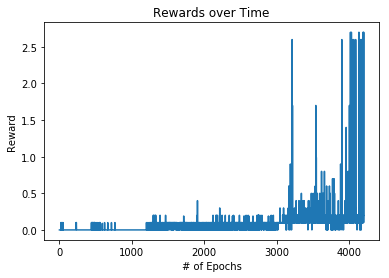

In [12]:
# smoother plot
avg_scores = []
window_size = 100
for i in range(window_size, len(scores_history)):
    avg_scores.append(sum(scores_history[i-window_size:i])/window_size)
    
# plot of rewards
import matplotlib.pyplot as plt
plt.title("Rewards over Time")
plt.xlabel("# of Epochs")
plt.ylabel("Reward")
plt.plot(range(1,len(scores_history) +1 ), scores_history)

starts at episode 100 and averages the past 100 episodes


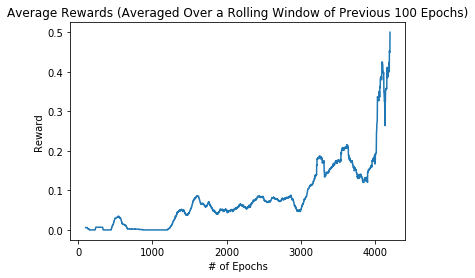

In [11]:
print("starts at episode {} and averages the past {} episodes".format(window_size, window_size))
plt.title("Average Rewards (Averaged Over a Rolling Window of Previous 100 Epochs)")
plt.xlabel("# of Epochs")
plt.ylabel("Reward")
plt.plot(range(100,len(avg_scores) +100 ), avg_scores)

In [14]:
%autoreload 1

In [18]:
import torch
from collections import deque

max_ts = 1000
max_episodes = 100
# show trained agent for a few episodes

curr_agent = agent.Agent(state_size, action_size, num_agents)
curr_agent.local_actor = torch.load('local_actor.pt')
curr_agent.local_critic = torch.load('local_critic.pt')
curr_agent.target_actor = torch.load('target_actor.pt')
curr_agent.target_critic = torch.load('target_critic.pt')

scores = deque(maxlen=100) 
                                       
for i in range(max_episodes):
    env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
    state = env_info.vector_observations                  # get the current state (for each agent)
    # resets the noise class variable
    curr_agent.reset()
    score = np.zeros(num_agents)

    for t in range(max_ts):
        action = curr_agent.act(state.astype('float32', copy=False))

        # env_info's variables are lists
        env_info = env.step(action)[brain_name]
        reward = env_info.rewards
        next_state = env_info.vector_observations
        done = env_info.local_done


        score += reward

        curr_agent.step(state, action, reward, next_state, done)
        state = next_state

        if np.any(done): 
            break

    max_score = max(score)
    scores.append(max_score)

print("Avg episode score: {}".format(np.mean(scores)))
print(scores)




Avg episode score: 0.8714000130072236
deque([2.6000000387430191, 2.7000000402331352, 0.10000000149011612, 0.19000000320374966, 2.6000000387430191, 0.10000000149011612, 0.40000000596046448, 0.10000000149011612, 2.6000000387430191, 2.7000000402331352, 2.6000000387430191, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.090000001713633537, 0.10000000149011612, 2.3000000342726707, 0.29000000469386578, 2.6000000387430191, 2.7000000402331352, 2.6000000387430191, 0.10000000149011612, 2.6000000387430191, 0.10000000149011612, 2.6000000387430191, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 2.6000000387430191, 0.10000000149011612, 2.6000000387430191, 2.6000000387430191, 0.20000000298023224, 0.10000000149011612, 0.20000000298023224, 0.10000000149011612, 2.6000000387430191, 2.7000000402331352, 0.80000001192092896, 0.20000000298023224, 2.6000000387430191, 0.10000000149011612, 0.2000

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 